# Projeto 3 - Redes Redes Neurais e Aprendizado Profundo
Aluno : Osni Brito de Jesus

NUSP : 11857330

## Questão 1 (valor 5 pontos)

Você deve criar a seguinte CNN usando o Keras:
* Parte convolucional da rede MobileNetV2;
    * Tal modelo deve se configurado para receber como entrada imagens
RGB com dimensões espaciais 128x128
    * Todos os parâmetros (pesos e bias) dessa parte do modelo devem ser
"congelados" (impedidos de atualizar);
    * Os parâmetros dessa parte do modelo devem ser obtidos do modelo
pré-treinado na ImageNet .

* Uma camada densa com ativação softmax.

E configurar o seu processo de otimização para usar:
* Otimizador Adam;
* Cross-entropy como loss;
* Acurácia como métrica de sucesso.

Dicas:
1. Use uma camada do tipo Flatten para transformar o output da parte
convolucional do modelo em um vetor;
2. Use o parâmetro input_shape para configurar o tamanho da imagem de
input;
3. Use a propriedade trainable das camadas convolucionais para que elas
sejam "congeladas";


In [133]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import mobilenet_v2
from keras.layers import Dense, Flatten


In [134]:
# Parte convolucional da rede MobileNetV2
# Usando parametros da 'imagenet'

mobilenet = mobilenet_v2.MobileNetV2(
    input_shape=(128,128,3),
    include_top=False,
    weights='imagenet',
    pooling=max
)

# Congelando parametros da parte convolucional
mobilenet.trainable = False

In [135]:
import os

# Quantidade de classes para determinar o numero de neuronios na ultima camada

num_classes = len(os.listdir('dataset/train'))

model = tf.keras.models.Sequential()
model.add(mobilenet) # mobilenetv2
model.add(Flatten())

# Ultima camada com a quantidade de classes de neuronios
model.add(Dense(num_classes, activation=tf.keras.activations.softmax))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Questão 2 (valor 5 pontos)

Treine o modelo usando o seguinte protocolo:
* Permita que os dados de treinamento (somente os dados de treinamento)
sejam distorcidos usando as seguintes transformações:
    * horizontal_flip=True;
    * zoom_range=0.2;
    * shear_range=10;
    * height_shift_range=0.1;
    * width_shift_range=0.1.

* Usando mini-batch de 32 imagens;
* O modelo deve ser treinado por 10 épocas (ou seja, que ele deve processar
durante o treinamento uma quantidade igual a 10x o tamanho da base de
treinamento).

Acompanhe a acurácia do modelo nos dados de treinamento e na base de teste ao
final de cada época.
Dicas:
1. Aplique a função de pré-processamento usada pela MobileNetV2;
2. Use dois ImageDataGenerator diferentes para que somente a base de
treinamento tenha data augmentation;
3. Ao usar a função flow_from_directory na base de teste, use
shuffle=False.

In [136]:
# Criando a base de treino com os parametros dados

datagen_train = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=mobilenet_v2.preprocess_input
)

train = datagen_train.flow_from_directory(
    'dataset/train/',
    class_mode="categorical",
    batch_size=32,
    target_size=(128, 128)
)


Found 2284 images belonging to 7 classes.


In [137]:
# Criando a base de teste

datagen_test = ImageDataGenerator(
    preprocessing_function=mobilenet_v2.preprocess_input
)

test = datagen_test.flow_from_directory(
    'dataset/test/',
    class_mode="categorical",
    batch_size=32,
    target_size=(128, 128),
    shuffle=False
)

Found 1400 images belonging to 7 classes.


O modelo possui uma acuracia muito alta, pontuando em sua melhor epoca 94.79%. Caso nao fosse feito alteracoes na base de treino atraves da função "ImageDataGenerator" o modelo teria um problema de overfitting, chegando a 100% de acuracia.

In [138]:
# treinamento do modelo

model.fit(
    train, 
    validation_data=test, 
    epochs=10,
    batch_size=32
)

Epoch 1/10
72/72 [==============================] - 36s 467ms/step - loss: 1.2501 - accuracy: 0.7408 - val_loss: 0.6567 - val_accuracy: 0.8664
Epoch 2/10
72/72 [==============================] - 35s 488ms/step - loss: 0.5619 - accuracy: 0.8831 - val_loss: 0.6229 - val_accuracy: 0.8664
Epoch 3/10
72/72 [==============================] - 33s 464ms/step - loss: 0.3818 - accuracy: 0.9102 - val_loss: 0.6151 - val_accuracy: 0.8886
Epoch 4/10
72/72 [==============================] - 38s 532ms/step - loss: 0.4012 - accuracy: 0.9151 - val_loss: 0.7653 - val_accuracy: 0.8686
Epoch 5/10
72/72 [==============================] - 27s 372ms/step - loss: 0.4079 - accuracy: 0.9168 - val_loss: 0.5257 - val_accuracy: 0.9093
Epoch 6/10
72/72 [==============================] - 21s 285ms/step - loss: 0.3737 - accuracy: 0.9308 - val_loss: 0.7260 - val_accuracy: 0.8814
Epoch 7/10
72/72 [==============================] - 20s 283ms/step - loss: 0.3308 - accuracy: 0.9387 - val_loss: 1.1751 - val_accuracy: 0.8321

In [139]:
# Criando a base para visualização utilizando um batch de tamanho 1

datagen_visualizacao = ImageDataGenerator(
    preprocessing_function=mobilenet_v2.preprocess_input
)

visualizacao = datagen_visualizacao.flow_from_directory(
    'dataset/test/',
    class_mode="categorical",
    batch_size=1,
    target_size=(128, 128)
)

Found 1400 images belonging to 7 classes.


Probabilidade: 100.00 %
Quem o modelo acha que é: lisa_simpson
Quem de fato é: lisa_simpson


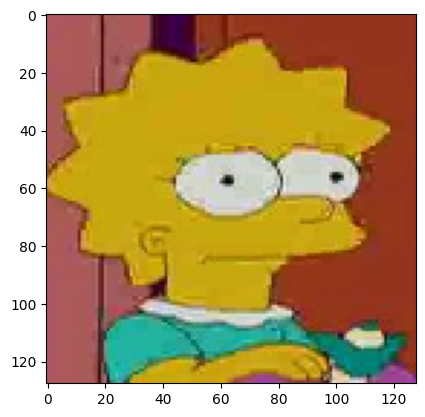

Probabilidade: 100.00 %
Quem o modelo acha que é: marge_simpson
Quem de fato é: marge_simpson


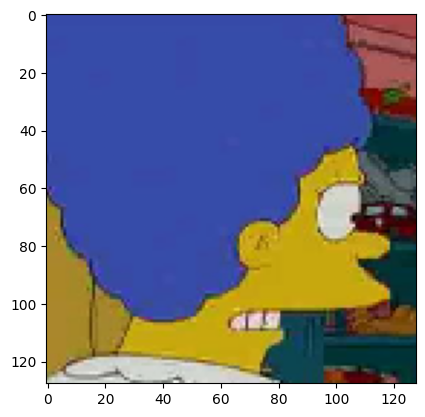

Probabilidade: 99.99 %
Quem o modelo acha que é: abraham_grampa_simpson
Quem de fato é: abraham_grampa_simpson


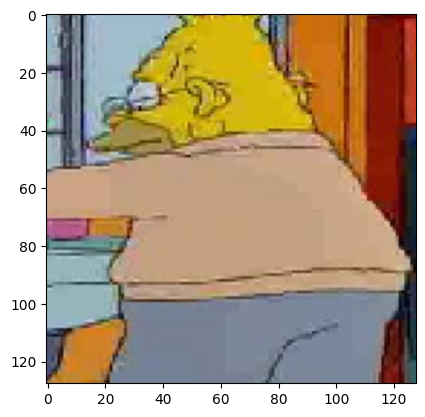

Probabilidade: 100.00 %
Quem o modelo acha que é: homer_simpson
Quem de fato é: homer_simpson


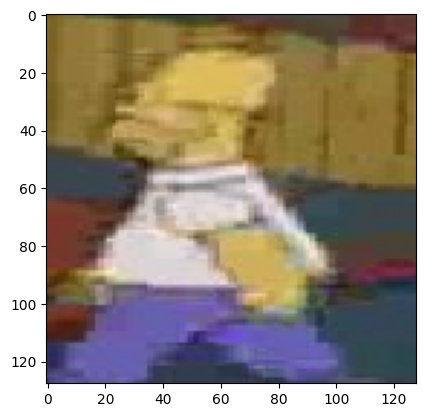

Probabilidade: 100.00 %
Quem o modelo acha que é: abraham_grampa_simpson
Quem de fato é: abraham_grampa_simpson


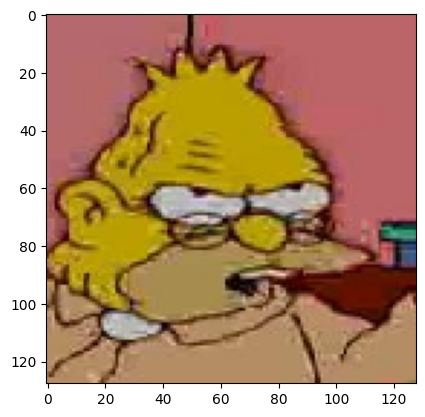

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Em visualizacao.class_indices possuimos o nome da classe como chave
# E o indice correspondente a tal classe como valor.
# para facilitar a visualizacao este dicionario inverte a chave com valor
# Afim de fazer buscas pela chave.
dict_classes = dict(zip(
    visualizacao.class_indices.values(),
    visualizacao.class_indices.keys()
    ))

# Quantidade de predicoes a serem visualizadas
n_predicts = 5

for _ in range(n_predicts):
    dict_classes
    img, label = visualizacao.next()
    prediction = model.predict(img, verbose=False)[0]

    # Desfazendo o pre processamento
    # Antes os pixeis estavam entre -1 e 1
    # Normalizando para 0 e 1
    img_norm = (img+1)/2

    predicted_class = np.argmax(prediction)
    real_class = np.argmax(label)

    print(f'Probabilidade: {100*prediction[predicted_class]:.2f} %')
    print(f'Quem o modelo acha que é: {dict_classes[predicted_class]}')
    print(f'Quem de fato é: {dict_classes[real_class]}')

    plt.imshow(img_norm[0])
    plt.show()
